## Importar librerias

In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
import plotly as py
import cufflinks as cf
cf.go_offline()
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import math
from IPython.display import display, HTML

## Importar datos

In [2]:
data = pd.read_csv('C:/Users/b4bsas/Downloads/cannabis.csv')
print(data.shape)
print(data.isnull().sum())
print(data.info())
print(data.describe())
data.head(n=6)

(2351, 6)
Strain          0
Type            0
Rating          0
Effects         0
Flavor         46
Description    33
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2351 entries, 0 to 2350
Data columns (total 6 columns):
Strain         2351 non-null object
Type           2351 non-null object
Rating         2351 non-null float64
Effects        2351 non-null object
Flavor         2305 non-null object
Description    2318 non-null object
dtypes: float64(1), object(5)
memory usage: 64.3+ KB
None
            Rating
count  2351.000000
mean      4.310634
std       0.836394
min       0.000000
25%       4.200000
50%       4.400000
75%       4.700000
max       5.000000


,Strain,Type,Rating,Effects,Flavor,Description
0,100-Og,hybrid,4.0,"Creative,Energetic,Tingly,Euphoric,Relaxed","Earthy,Sweet,Citrus",$100 OG is a 50/50 hybrid strain that packs a ...
1,98-White-Widow,hybrid,4.7,"Relaxed,Aroused,Creative,Happy,Energetic","Flowery,Violet,Diesel",The ‘98 Aloha White Widow is an especially pot...
2,1024,sativa,4.4,"Uplifted,Happy,Relaxed,Energetic,Creative","Spicy/Herbal,Sage,Woody",1024 is a sativa-dominant hybrid bred in Spain...
3,13-Dawgs,hybrid,4.2,"Tingly,Creative,Hungry,Relaxed,Uplifted","Apricot,Citrus,Grapefruit",13 Dawgs is a hybrid of G13 and Chemdawg genet...
4,24K-Gold,hybrid,4.6,"Happy,Relaxed,Euphoric,Uplifted,Talkative","Citrus,Earthy,Orange","Also known as Kosher Tangie, 24k Gold is a 60%..."
5,3-Bears-Og,indica,0.0,None,None,3 Bears OG by Mephisto Genetics is an autoflow...


In [3]:
data2 = data[data.isnull().any(axis=1)]
data2.head()
data2.shape

,Strain,Type,Rating,Effects,Flavor,Description
103,Amethyst,hybrid,3.9,"Energetic,Creative,Giggly,Hungry,Happy",NaN,Amethyst is a hybrid cannabis strain from the ...
123,Arabian-Gold,sativa,4.1,"Euphoric,Tingly,Giggly,Sleepy,Creative",NaN,Arabian Gold is a heavy sativa strain of myste...
160,Bad-Azz-Kush,hybrid,5.0,None,NaN,Bad Azz Kush by Barney’s Farm was created with...
163,Banana-Candy,indica,4.2,"Relaxed,Euphoric,Uplifted,Creative,Happy","Tree,Fruit,Earthy,Sweet",NaN
215,Birds-Eye,sativa,5.0,"Happy,Uplifted,Energetic,Euphoric,Relaxed",NaN,Birds Eye is a variety of Jack Herer grown by ...


(74, 6)

In [4]:
data3 = data[data.Effects=='None']
data3.head()
data3.shape

,Strain,Type,Rating,Effects,Flavor,Description
5,3-Bears-Og,indica,0.0,None,None,3 Bears OG by Mephisto Genetics is an autoflow...
16,831-Og,indica,5.0,None,None,"831 OG, aka Santa Cruz OG, is an indica-domina..."
54,Afrikaner,sativa,0.0,None,None,Afrikaner by Cannabaal and master grower Waldo...
94,Alpha-Cow,sativa,5.0,None,None,Alpha Cow is a sativa strain that brings toget...
106,Amnesia-Ganja-Haze,sativa,5.0,None,None,Amnesia Ganja Haze is another award-winning st...


(87, 6)

In [5]:
data3 = data[data.Flavor=='None']
data3.head()
data3.shape

,Strain,Type,Rating,Effects,Flavor,Description
5,3-Bears-Og,indica,0.0,None,None,3 Bears OG by Mephisto Genetics is an autoflow...
16,831-Og,indica,5.0,None,None,"831 OG, aka Santa Cruz OG, is an indica-domina..."
32,Acid-Dough,sativa,5.0,"Talkative,Giggly,Happy,Hungry,Relaxed",None,Acid Dough by Ripper Seeds is a sativa-dominan...
54,Afrikaner,sativa,0.0,None,None,Afrikaner by Cannabaal and master grower Waldo...
60,Als-Dream,hybrid,3.0,"Talkative,Energetic",None,Al’s Dream is rapidly becoming a Colorado cann...


(110, 6)

In [6]:
x=[]
y=[]
for i in data.Strain.tolist():
    if i.endswith('Og'):
        x.append(i)


In [7]:
data_type = data.groupby(['Type'], as_index=False)['Strain'].count()
data_type
data_type.iplot(kind='bar', x='Type', xTitle='Cepas',yTitle='total', title='Cepas por tipo')

,Type,Strain
0,hybrid,1212
1,indica,699
2,sativa,440


In [8]:
data_rating = data.groupby(['Rating'], as_index=False)['Strain'].count()
data_rating.iplot(kind='bar', x='Rating', xTitle='Rating',yTitle='total', title='Rating Cepas')

<Figure size 720x1440 with 0 Axes>

Text(0.5, 0, 'Rating')

Text(0, 0.5, 'Distribucion')

Text(0.5, 1.0, 'Distribucion Rating Hibridas')

Text(0.5, 0, 'Rating')

Text(0, 0.5, 'Distribuition')

Text(0.5, 1.0, 'Distribucion Rating Sativas')

Text(0.5, 0, 'Rating')

Text(0, 0.5, 'Distribucion')

Text(0.5, 1.0, 'Distribucion RatingIndicas')

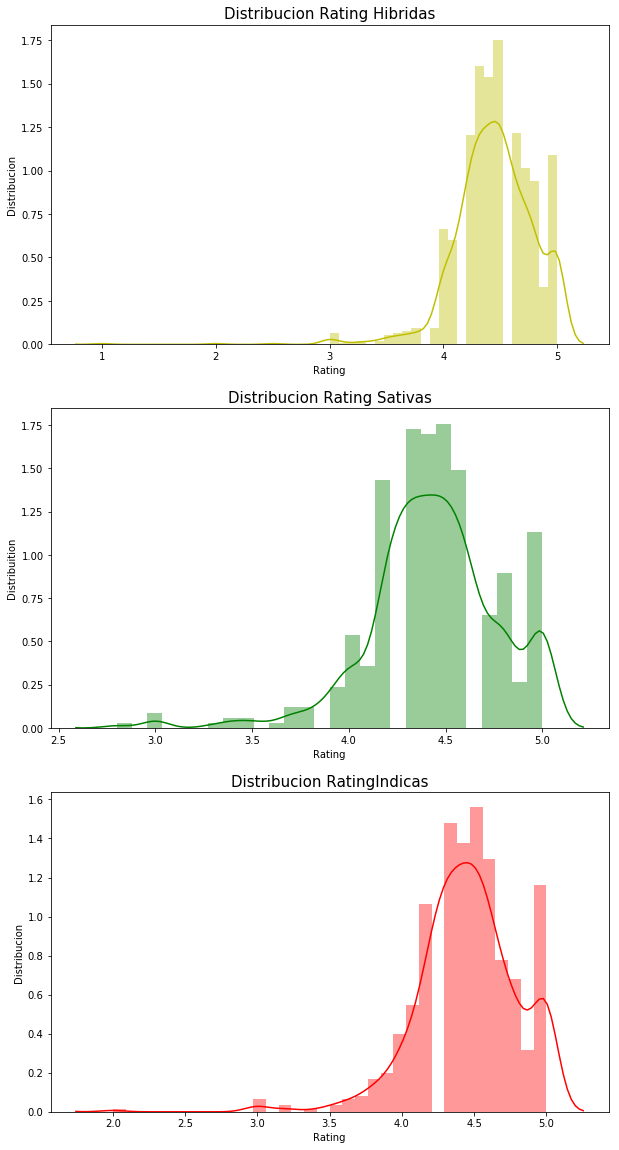

In [9]:
plt.figure(figsize=(10,20))

data_hybrid = plt.subplot(3,1,1)
data_hybrid = sns.distplot(data[(data.Type == 'hybrid') & 
                               (data.Rating > 0)]["Rating"], color='y')
data_hybrid.set_xlabel("Rating", fontsize=10)
data_hybrid.set_ylabel("Distribucion", fontsize=10)
data_hybrid.set_title("Distribucion Rating Hibridas", fontsize=15)

data_sativa = plt.subplot(3,1,2)
data_sativa = sns.distplot(data[(data.Type == 'sativa') & 
                               (data.Rating > 0)]["Rating"], color='g')
data_sativa.set_xlabel("Rating", fontsize=10)
data_sativa.set_ylabel("Distribuition", fontsize=10)
data_sativa.set_title("Distribucion Rating Sativas", fontsize=15)

data_indica = plt.subplot(3,1,3)
data_indica = sns.distplot(data[(data.Type == 'indica') & 
                               (data.Rating > 0)]["Rating"], color='r')
data_indica.set_xlabel("Rating", fontsize=10)
data_indica.set_ylabel("Distribucion", fontsize=10)
data_indica.set_title("Distribucion RatingIndicas", fontsize=15)

plt.show()

Text(0.5, 1.0, 'Distribucion Rating')

Text(0.5, 0, 'Rating')

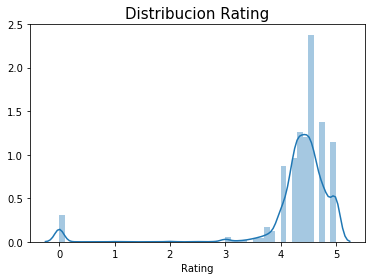

In [10]:
data_completo = sns.distplot(data["Rating"], bins=50)
data_completo.set_title("Distribucion Rating", size = 15)
data_completo.set_xlabel('Rating', fontsize=10)

<Figure size 720x432 with 0 Axes>

Text(0.5, 0, 'Tipos')

Text(0, 0.5, 'Frecuencia')

Text(0.5, 1.0, 'Distribucion de los tipos con Rating 5.0  ')

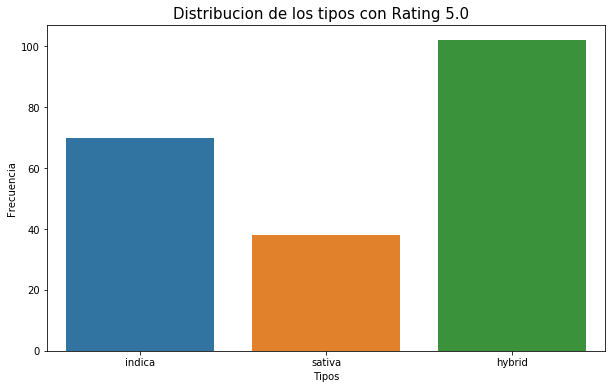

In [11]:
plt.figure(figsize=(10,6))
data_5 = sns.countplot(x="Type",data=data[data["Rating"] == 5])
data_5.set_xlabel('Tipos', fontsize=10)
data_5.set_ylabel('Frecuencia', fontsize=10)
data_5.set_title("Distribucion de los tipos con Rating 5.0  ", fontsize=15)

plt.show()

In [12]:
data_effect = pd.DataFrame(data.Effects.str.split(',',4).tolist(),
             columns = ['Effect_1','Effect_2','Effect_3','Effect_4','Effect_5'])

data_flavors = pd.DataFrame(data.Flavor.str.split(',',n=2,expand=True).values.tolist(),
                          columns = ['Flavor_1','Flavor_2','Flavor_3'])
data = pd.concat([data, data_effect], axis=1)
data = pd.concat([data, data_flavors], axis=1)
data.head()

,Strain,Type,Rating,Effects,Flavor,Description,Effect_1,Effect_2,Effect_3,Effect_4,Effect_5,Flavor_1,Flavor_2,Flavor_3
0,100-Og,hybrid,4.0,"Creative,Energetic,Tingly,Euphoric,Relaxed","Earthy,Sweet,Citrus",$100 OG is a 50/50 hybrid strain that packs a ...,Creative,Energetic,Tingly,Euphoric,Relaxed,Earthy,Sweet,Citrus
1,98-White-Widow,hybrid,4.7,"Relaxed,Aroused,Creative,Happy,Energetic","Flowery,Violet,Diesel",The ‘98 Aloha White Widow is an especially pot...,Relaxed,Aroused,Creative,Happy,Energetic,Flowery,Violet,Diesel
2,1024,sativa,4.4,"Uplifted,Happy,Relaxed,Energetic,Creative","Spicy/Herbal,Sage,Woody",1024 is a sativa-dominant hybrid bred in Spain...,Uplifted,Happy,Relaxed,Energetic,Creative,Spicy/Herbal,Sage,Woody
3,13-Dawgs,hybrid,4.2,"Tingly,Creative,Hungry,Relaxed,Uplifted","Apricot,Citrus,Grapefruit",13 Dawgs is a hybrid of G13 and Chemdawg genet...,Tingly,Creative,Hungry,Relaxed,Uplifted,Apricot,Citrus,Grapefruit
4,24K-Gold,hybrid,4.6,"Happy,Relaxed,Euphoric,Uplifted,Talkative","Citrus,Earthy,Orange","Also known as Kosher Tangie, 24k Gold is a 60%...",Happy,Relaxed,Euphoric,Uplifted,Talkative,Citrus,Earthy,Orange


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47]),
 <a list of 48 Text xticklabel objects>)

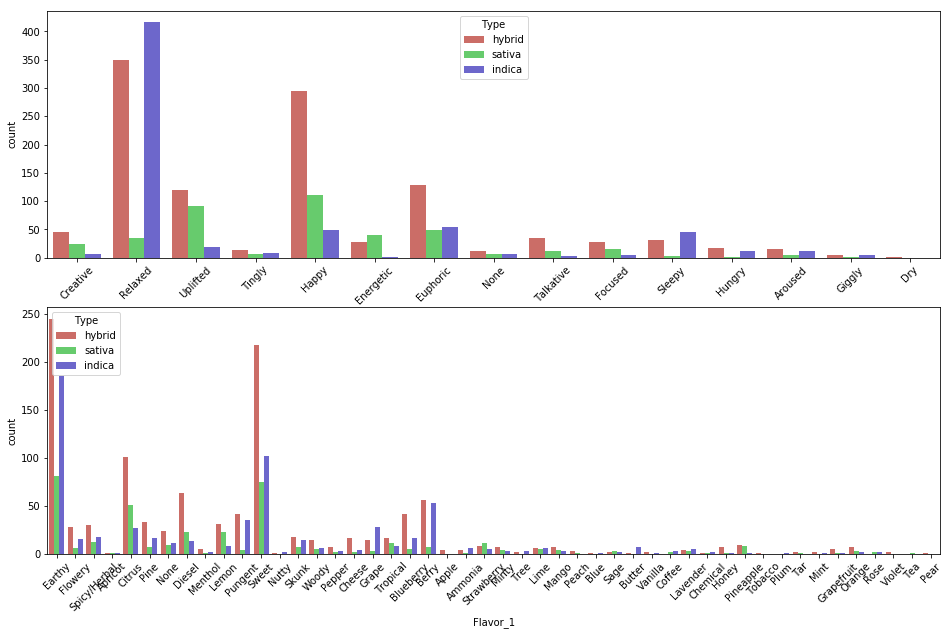

In [13]:
strains_top = data[data["Rating"] >= 4]

fig, ax = plt.subplots(2,1, figsize=(16,10))

sns.countplot(x ='Effect_1',data = strains_top,hue="Type",ax=ax[0], palette='hls')

sns.countplot(x ='Flavor_1',data = strains_top,hue="Type",ax=ax[1], palette='hls')

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text xticklabel objects>)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46]),
 <a list of 47 Text xticklabel objects>)

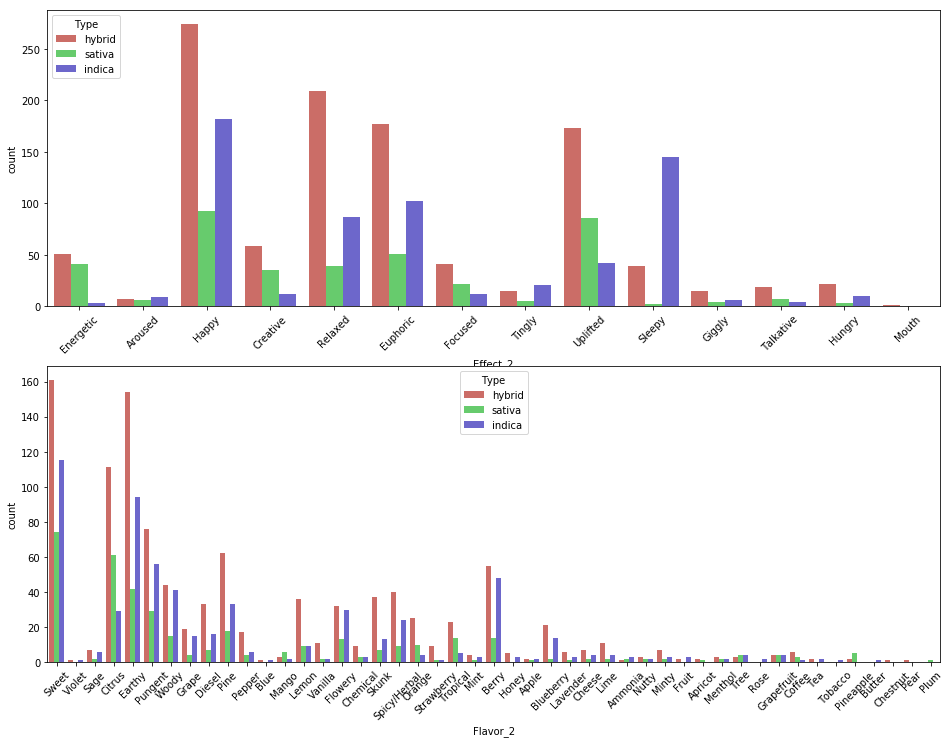

In [14]:
strains_top = data[data["Rating"] >= 4]

fig, ax = plt.subplots(2,1, figsize=(16,12))

sns.countplot(x ='Effect_2',data = strains_top,hue="Type",ax=ax[0], palette='hls')

sns.countplot(x ='Flavor_2',data = strains_top,hue="Type",ax=ax[1], palette='hls')

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=45)

In [15]:
hibrida = data[data.Type == 'hybrid']
indica = data[data.Type == 'indica']
sativa = data[data.Type == 'sativa']
del data["Effects"]
del data["Flavor"]
def get_effects(dataframe):
    ret_dict = {}
    for list_ef in dataframe.Effects:
        effects_list = list_ef.split(',')
        for effect in effects_list:
            if not effect in ret_dict:
                ret_dict[effect] = 1
            else:
                ret_dict[effect] += 1
    return ret_dict

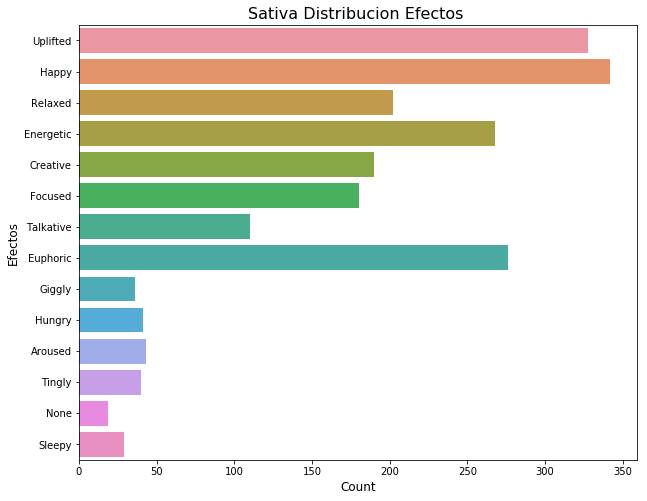

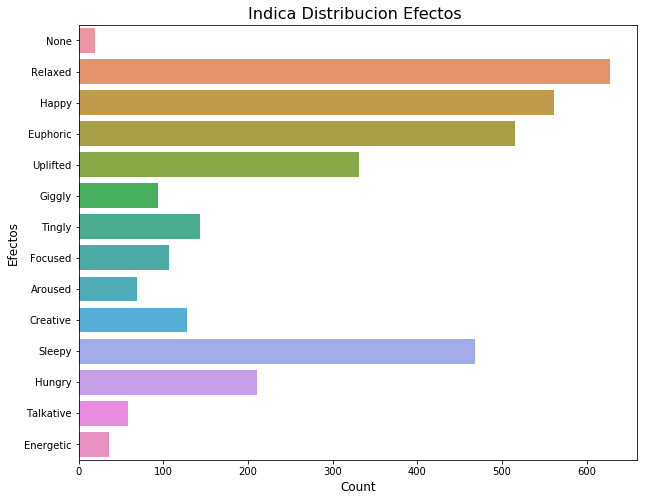

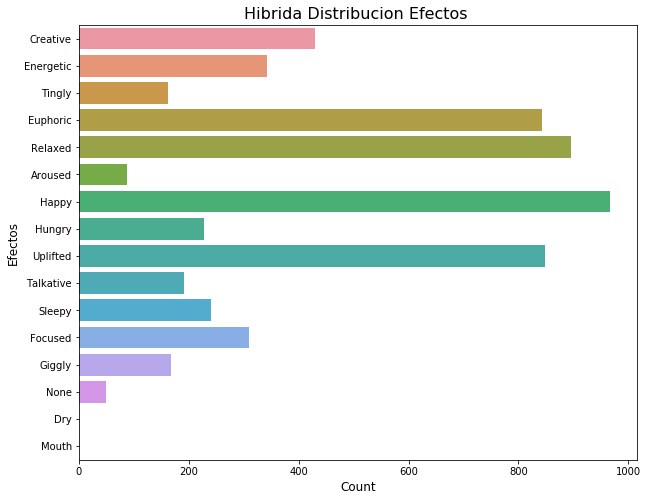

In [16]:
def plot_efects(x,y):
    x = get_effects(x)

    plt.figure(figsize=(10,8))
    sns.barplot(list(x.values()), list(x.keys()), orient='h')
    plt.xlabel("Count", fontsize=12)
    plt.ylabel("Efectos", fontsize=12)
    plt.title(y+" Distribucion Efectos ", fontsize=16)
    plt.show()
plot_efects(sativa,'Sativa')
plot_efects(indica,'Indica')
plot_efects(hibrida,'Hibrida')

In [17]:
def flavors(df):
    ret_dict = {}
    for list_ef in df.Flavor.dropna():
        flavors_list = list_ef.split(',')
        for flavor in flavors_list:
            if not flavor in ret_dict:
                ret_dict[flavor] = 1
            else:
                ret_dict[flavor] += 1
    return ret_dict

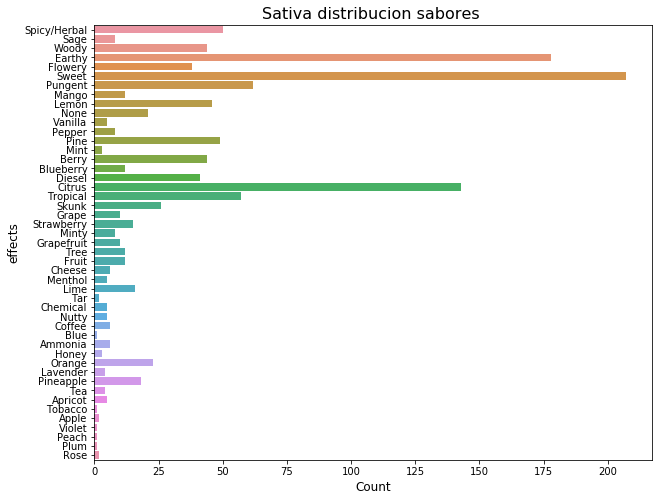

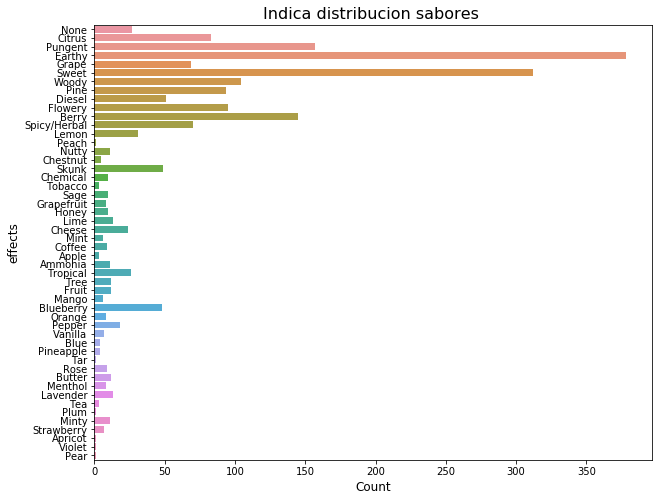

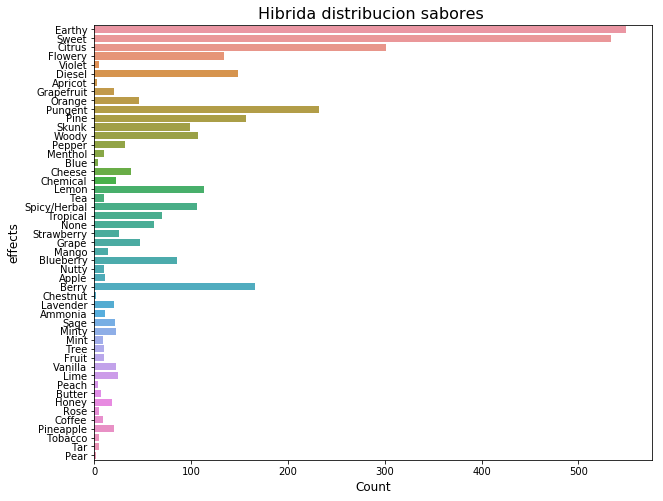

In [19]:
def plot_flavors(x,y):
    x = flavors(x)

    plt.figure(figsize=(10,8))
    sns.barplot(list(x.values()), list(x.keys()), orient='h')
    plt.xlabel("Count", fontsize=12)
    plt.ylabel("effects", fontsize=12)
    plt.title(y+" distribucion sabores ", fontsize=16)
    plt.show()
plot_flavors(sativa,'Sativa')
plot_flavors(indica,'Indica')
plot_flavors(hibrida,'Hibrida')